<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/Model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 3 - Support Vector Machine + XgBoost + Gradient Boosting Tree + K-Nearest Neighbor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import log_loss

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')
df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

In [ ]:
# one hot encoding race
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

# one hot encoding dzgroup
# ohe = pd.get_dummies(df[['dzgroup']])
# df = df.drop(['dzgroup'], axis = 1)

#label encode dzgroup
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['dzgroup'])

X = df.copy().drop(columns = 'dzgroup')
#y = ohe.copy()
df = pd.concat([df, ohe], axis = 1)

In [ ]:
X

,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,alb,bili,crea,sod,ph,race_asian,race_black,race_hispanic,race_other,race_white
0,62.84998,1,0,0.0,33.898438,20.0,0,0,97.0,6.000000,...,1.799805,0.199982,1.199951,141.0,7.459961,0,0,0,1,0
6,62.37097,1,1,0.0,17.296875,46.0,0,0,78.0,11.699219,...,4.799805,0.399963,1.599854,132.0,7.479492,0,0,0,0,1
17,63.66299,0,1,26.0,40.296875,58.0,0,0,69.0,30.097656,...,2.899902,14.000000,2.899902,130.0,7.449219,0,0,0,0,1
22,49.61298,0,0,0.0,31.699219,42.0,0,0,67.0,11.000000,...,2.000000,4.099609,0.599976,130.0,7.399414,0,0,0,0,1
25,53.84000,1,1,0.0,14.199219,16.0,0,0,134.0,7.799805,...,3.799805,0.500000,0.799927,141.0,7.379883,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,79.17596,1,0,9.0,22.097656,28.0,0,0,80.0,15.798828,...,3.000000,0.299988,0.699951,135.0,7.449219,0,0,0,0,1
9099,68.61597,0,0,0.0,15.298828,19.0,0,0,71.0,12.599609,...,4.099609,0.599976,0.799927,128.0,7.489258,0,0,0,0,1
9100,66.07300,1,0,0.0,16.296875,22.0,0,0,109.0,7.399414,...,3.699707,0.399963,1.099854,131.0,7.459961,0,0,0,0,1
9103,47.01999,1,1,0.0,40.195312,51.0,0,0,99.0,7.599609,...,1.199951,0.399963,3.500000,135.0,7.469727,0,0,0,0,1


### StandardScaler

In [ ]:
non_num_X = X.iloc[:, 19:]
num_X = X.drop(X.columns[19:], axis=1)
num_X = num_X.drop(columns=['sex'])

scaler = StandardScaler()
StandardScaler()

X_scaled = scaler.fit_transform(num_X)
X_scaled = np.concatenate([X_scaled, non_num_X.values], axis=1)

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

# XgBoost


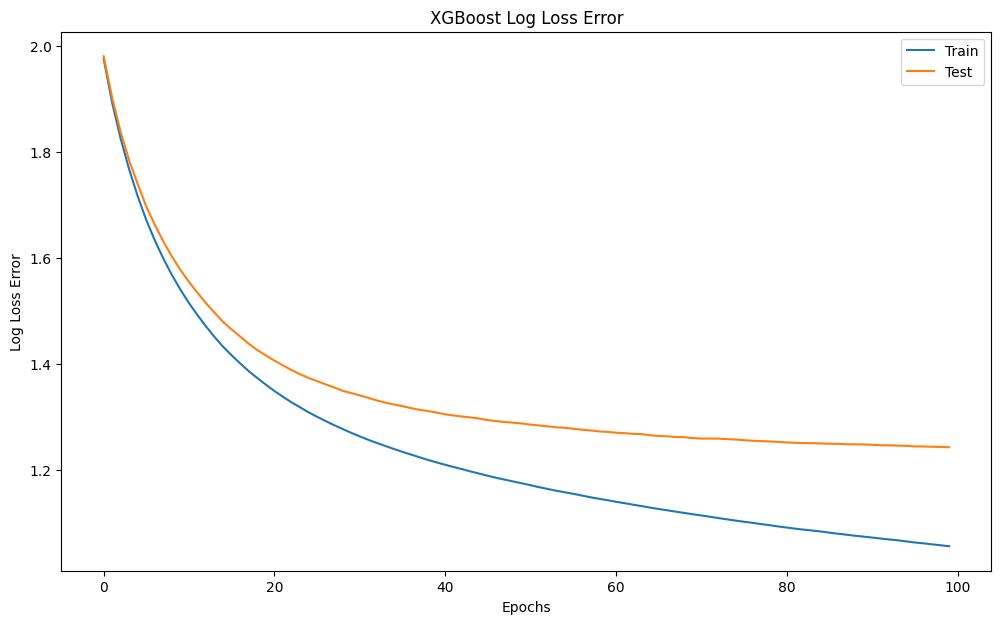

In [ ]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(objective='multi:softmax', max_depth=2, learning_rate=0.1, n_estimators=100, eval_metric='mlogloss')
model.fit(X_train, y_train, eval_set=eval_set, verbose=0)

results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

train_error = results['validation_0']['mlogloss']
test_error = results['validation_1']['mlogloss']

plt.figure(figsize=(12, 7))
plt.plot(x_axis, train_error, label='Train')
plt.plot(x_axis, test_error, label='Test')

plt.legend()
plt.ylabel('Log Loss Error')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss Error')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69       333
           1       0.42      0.35      0.39        96
           2       0.37      0.27      0.31        83
           3       0.50      0.12      0.20        49
           4       0.50      0.11      0.18        18
           5       0.71      0.52      0.60        77
           6       0.42      0.38      0.40        42
           7       0.88      0.21      0.34        70

    accuracy                           0.55       768
   macro avg       0.55      0.35      0.39       768
weighted avg       0.56      0.55      0.51       768



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = xgb.XGBClassifier()

param_dist = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=25, scoring='accuracy', cv=3, verbose=1, random_state=0)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters found:  {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best accuracy found:  0.5810546875


In [ ]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best accuracy found:  0.583984375


# Gradient boosted Tree


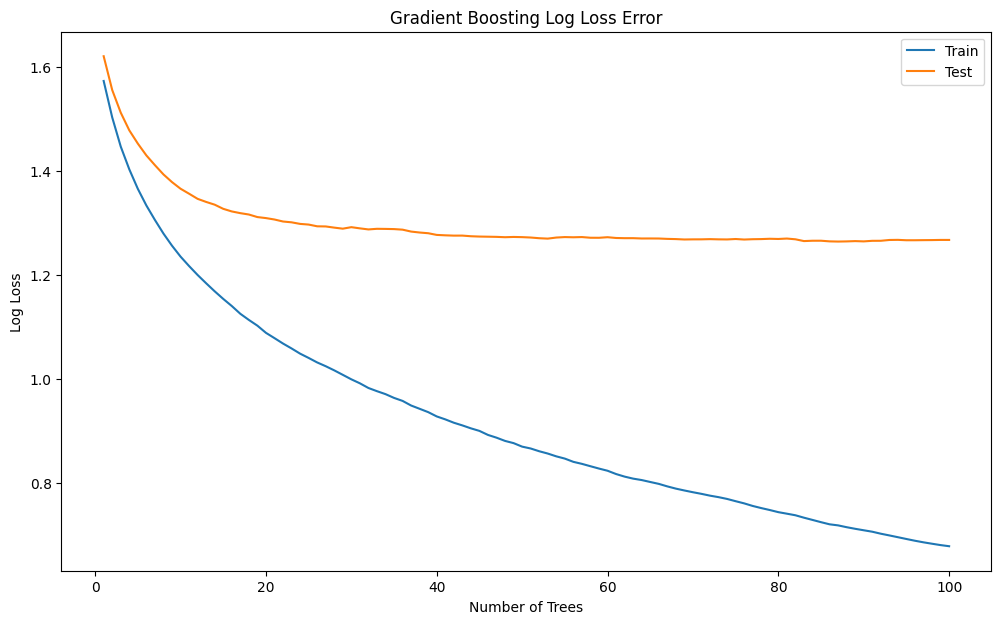

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=21)

# Train the model
model.fit(X_train, y_train)

# Retrieve the staged predictions
train_error = [log_loss(y_train, y_pred_proba) for y_pred_proba in model.staged_predict_proba(X_train)]
test_error = [log_loss(y_test, y_pred_proba) for y_pred_proba in model.staged_predict_proba(X_test)]

x_axis = range(1, len(train_error) + 1)

# Plot the log loss error for each iteration
plt.figure(figsize=(12, 7))
plt.plot(x_axis, train_error, label='Train')
plt.plot(x_axis, test_error, label='Test')

plt.legend()
plt.ylabel('Log Loss')
plt.xlabel('Number of Trees')
plt.title('Gradient Boosting Log Loss Error')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70       333
           1       0.45      0.41      0.43        96
           2       0.41      0.31      0.36        83
           3       0.50      0.24      0.33        49
           4       0.38      0.17      0.23        18
           5       0.69      0.56      0.62        77
           6       0.41      0.40      0.41        42
           7       0.83      0.21      0.34        70

    accuracy                           0.56       768
   macro avg       0.53      0.39      0.43       768
weighted avg       0.57      0.56      0.54       768



In [ ]:
y_pred = tree.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1392
           1       0.81      0.68      0.74       377
           2       0.80      0.65      0.71       364
           3       0.87      0.62      0.72       199
           4       1.00      0.79      0.88        80
           5       0.90      0.82      0.86       188
           6       0.83      0.74      0.78       204
           7       0.96      0.46      0.62       268

    accuracy                           0.79      3072
   macro avg       0.86      0.71      0.77      3072
weighted avg       0.80      0.79      0.78      3072



**oversampling for tree**

In [ ]:
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

7    1392
0    1392
1    1392
5    1392
2    1392
3    1392
6    1392
4    1392
dtype: int64

In [ ]:
tree_oversampled = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=21)

# Train the model
tree_oversampled.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=21)

In [ ]:
y_pred = tree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       333
           1       0.40      0.45      0.42        96
           2       0.33      0.35      0.34        83
           3       0.43      0.51      0.47        49
           4       0.22      0.28      0.24        18
           5       0.64      0.73      0.68        77
           6       0.39      0.57      0.46        42
           7       0.41      0.40      0.40        70

    accuracy                           0.53       768
   macro avg       0.44      0.48      0.46       768
weighted avg       0.55      0.53      0.53       768



In [ ]:
y_pred = tree.predict(X_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1392
           1       0.67      0.71      0.69       377
           2       0.65      0.67      0.66       364
           3       0.62      0.72      0.67       199
           4       0.70      0.86      0.77        80
           5       0.70      0.85      0.77       188
           6       0.68      0.79      0.73       204
           7       0.56      0.64      0.59       268

    accuracy                           0.72      3072
   macro avg       0.67      0.75      0.71      3072
weighted avg       0.73      0.72      0.72      3072



# SVM

In [ ]:
# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors
svm = SVC(kernel ='poly', degree = 2)
svm.fit(X_train,y_train)
y_true = y_test
y_pred = svm.predict(X_test)
print(classification_report(y_true, y_pred, zero_division=0))
# Evaluate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.52      0.89      0.66       333
           1       0.45      0.29      0.35        96
           2       0.37      0.23      0.28        83
           3       0.67      0.08      0.15        49
           4       0.00      0.00      0.00        18
           5       0.70      0.40      0.51        77
           6       0.32      0.21      0.26        42
           7       0.64      0.10      0.17        70

    accuracy                           0.51       768
   macro avg       0.46      0.28      0.30       768
weighted avg       0.51      0.51      0.45       768

Accuracy: 0.5130208333333334


## Try to find optimiaze parameters


In [ ]:
# find the beter parameters
# test for best model

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'poly']}
# Create an SVM classifier
svm_classifier = SVC()
# Create the GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, scoring='accuracy')
# Fit the model with different hyperparameter combinations
grid_search.fit(X_train,y_train.idxmax(axis=1).values)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Get the best model
best_model = grid_search.best_estimator_
# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test.idxmax(axis=1).values)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy}")

Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy on Test Set: 0.53515625


## OverSampling with scaled data

### SMOTE


In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=21)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train.idxmax(axis=1).values)
# After oversampling
unique_classes_resampled, class_counts_resampled = np.unique(y_train_resampled, return_counts=True)
for class_label, count in zip(unique_classes_resampled, class_counts_resampled):
    print(f"Frequency of Class {class_label}: {count} instances")

Frequency of Class dzgroup_ARF/MOSF w/Sepsis: 1392 instances
Frequency of Class dzgroup_CHF: 1392 instances
Frequency of Class dzgroup_COPD: 1392 instances
Frequency of Class dzgroup_Cirrhosis: 1392 instances
Frequency of Class dzgroup_Colon Cancer: 1392 instances
Frequency of Class dzgroup_Coma: 1392 instances
Frequency of Class dzgroup_Lung Cancer: 1392 instances
Frequency of Class dzgroup_MOSF w/Malig: 1392 instances


### Evaluation

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 0.1)
svm_classifier.fit(X_train_resampled,y_train_resampled)
y_true = y_test.idxmax(axis=1).values
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_true, y_pred))
# Evaluate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

                           precision    recall  f1-score   support

dzgroup_ARF/MOSF w/Sepsis       0.60      0.71      0.65       333
              dzgroup_CHF       0.41      0.38      0.39        96
             dzgroup_COPD       0.31      0.29      0.30        83
        dzgroup_Cirrhosis       0.42      0.33      0.37        49
     dzgroup_Colon Cancer       0.06      0.06      0.06        18
             dzgroup_Coma       0.55      0.39      0.45        77
      dzgroup_Lung Cancer       0.28      0.26      0.27        42
     dzgroup_MOSF w/Malig       0.30      0.24      0.27        70

                 accuracy                           0.48       768
                macro avg       0.37      0.33      0.34       768
             weighted avg       0.47      0.48      0.47       768

Accuracy: 0.484375


### RandomOverSampler

In [ ]:
rs = RandomOverSampler(random_state=11)
X_train_resampled, y_train_resampled = rs.fit_resample(X_train, y_train.idxmax(axis=1).values)
# After oversampling
unique_classes_resampled, class_counts_resampled = np.unique(y_train_resampled, return_counts=True)
for class_label, count in zip(unique_classes_resampled, class_counts_resampled):
    print(f"Frequency of Class {class_label}: {count} instances")


Frequency of Class dzgroup_ARF/MOSF w/Sepsis: 1392 instances
Frequency of Class dzgroup_CHF: 1392 instances
Frequency of Class dzgroup_COPD: 1392 instances
Frequency of Class dzgroup_Cirrhosis: 1392 instances
Frequency of Class dzgroup_Colon Cancer: 1392 instances
Frequency of Class dzgroup_Coma: 1392 instances
Frequency of Class dzgroup_Lung Cancer: 1392 instances
Frequency of Class dzgroup_MOSF w/Malig: 1392 instances


### Evaluation

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 0.1)
svm_classifier.fit(X_train_resampled,y_train_resampled)
y_true = y_test.idxmax(axis=1).values
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_true, y_pred))
# Evaluate the accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

                           precision    recall  f1-score   support

dzgroup_ARF/MOSF w/Sepsis       0.61      0.75      0.67       333
              dzgroup_CHF       0.48      0.43      0.45        96
             dzgroup_COPD       0.32      0.29      0.30        83
        dzgroup_Cirrhosis       0.50      0.37      0.42        49
     dzgroup_Colon Cancer       0.06      0.06      0.06        18
             dzgroup_Coma       0.56      0.40      0.47        77
      dzgroup_Lung Cancer       0.20      0.17      0.18        42
     dzgroup_MOSF w/Malig       0.36      0.27      0.31        70

                 accuracy                           0.51       768
                macro avg       0.39      0.34      0.36       768
             weighted avg       0.49      0.51      0.49       768

Accuracy: 0.5091145833333334


# K-Nearest Neighbor

In [ ]:
#oversample.  we don't use because it decreases accuracy

# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#KNN. similar result to SVM
k = 10
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_true = y_test
y_pred = knn_classifier.predict(X_test)
print(classification_report(y_true, y_pred, zero_division = 0))

                   precision    recall  f1-score   support

ARF/MOSF w/Sepsis       0.53      0.83      0.65       333
              CHF       0.41      0.35      0.38        96
             COPD       0.30      0.31      0.31        83
        Cirrhosis       0.57      0.16      0.25        49
     Colon Cancer       0.00      0.00      0.00        18
             Coma       0.73      0.31      0.44        77
      Lung Cancer       0.31      0.10      0.15        42
     MOSF w/Malig       0.50      0.10      0.17        70

         accuracy                           0.50       768
        macro avg       0.42      0.27      0.29       768
     weighted avg       0.49      0.50      0.44       768

